<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;"> IRIS FLOWERS PREDICTION USING SELF ORGANIZING MECHANISMS</h1>

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:LEFT; background-color:#ECF0F1; padding:10px; border-radius:10px;">LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">IMPORT FILES</h1>

In [3]:
iris = pd.read_csv("Iris.csv")

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

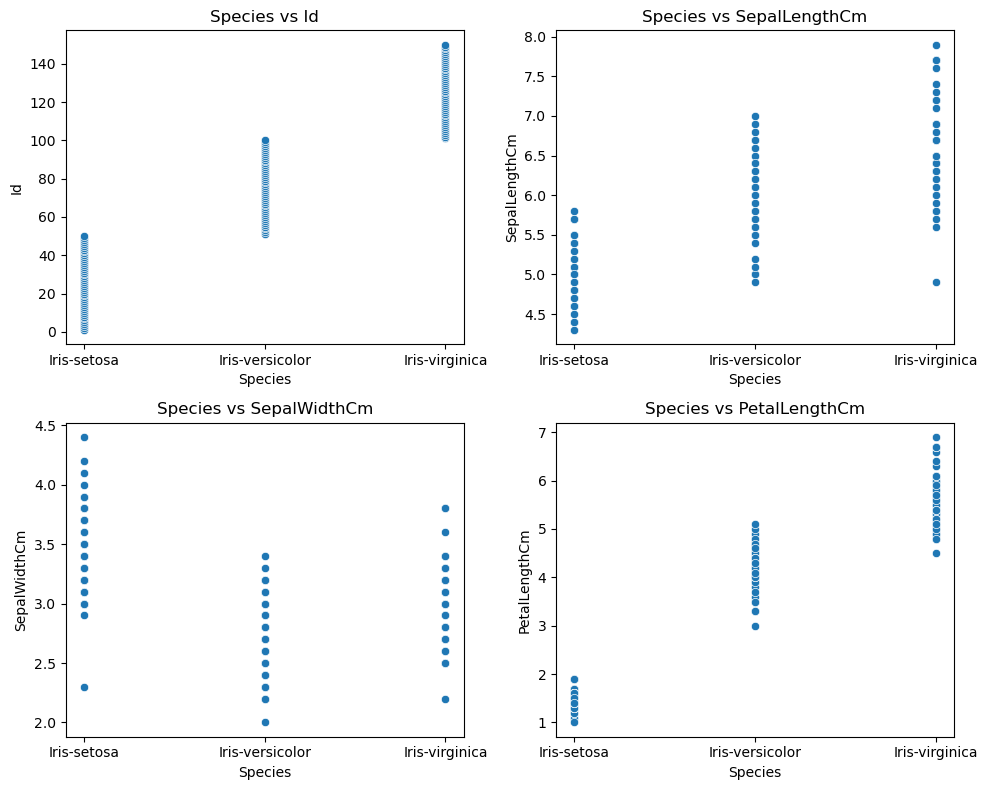

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
cols = iris.columns[:-1] 
for ax, col in zip(axes.flat, cols):
    sns.scatterplot(x='Species', y=col, data=iris, ax=ax)
    ax.set_title(f'Species vs {col}')
plt.tight_layout()
plt.show()

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:LEFT; background-color:#ECF0F1; padding:10px; border-radius:10px;"> MODEL PREPARATION AND PREDICTION USING SELF PRGANISING MAP</h1>

In [9]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

In [10]:
X = iris.drop(['Species','Id'], axis =1)

In [12]:
standard = MinMaxScaler()
cleaneddata = pd.DataFrame(standard.fit_transform(X))

In [13]:
X.shape

(150, 4)

In [ ]:
!pip install minisom

In [ ]:
from minisom import MiniSom

In [ ]:
som = MiniSom(7,7,5,sigma =0.25)

som.train_random(cleaneddata.to_numpy(), 30000)

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">CONVERT CATEGORY TO NUMERIC USING CAT CODES</h1>

In [14]:
y = iris.Species.astype('category')

In [16]:
y= y.cat.codes

In [17]:
X_array = X.values

In [18]:
som = MiniSom(x=7, y=7, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)

In [19]:
som.random_weights_init(X_array)

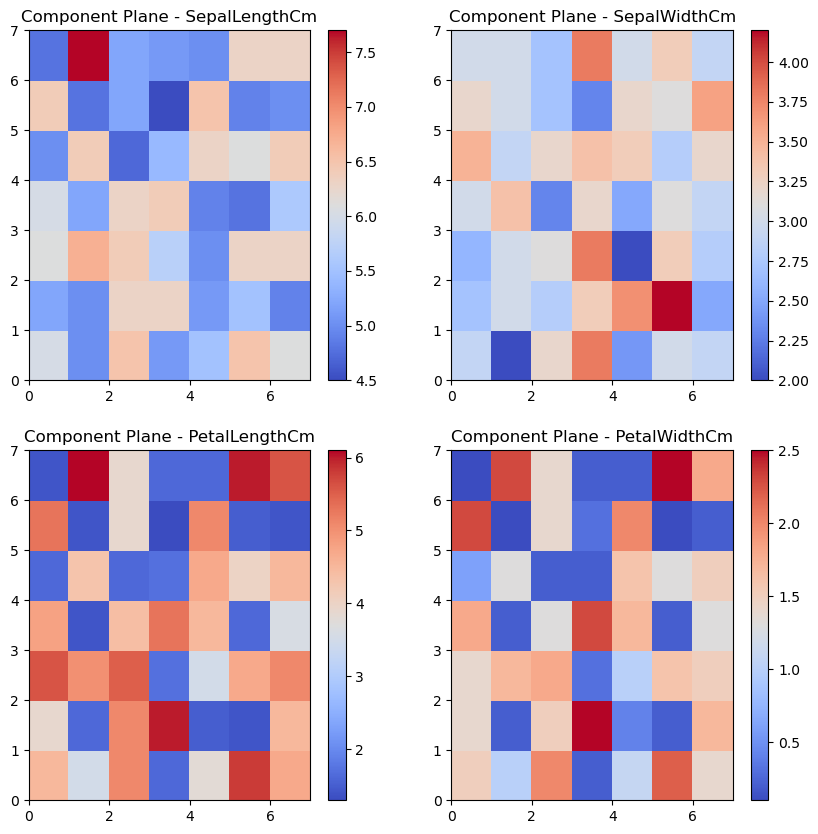

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    plane = som.get_weights()[:, :, i]
    c = ax.pcolor(plane.T, cmap='coolwarm')
    ax.set_title(f"Component Plane - {X.columns[i]}")  
    fig.colorbar(c, ax=ax)

plt.show()


In [21]:
som.train_random(X_array, num_iteration=100)

In [23]:
label_map = som.labels_map(X_array, y)

In [24]:
label_map

defaultdict(list,
            {(np.int64(4), np.int64(6)): Counter({0: 8}),
             (np.int64(5), np.int64(5)): Counter({0: 12}),
             (np.int64(0), np.int64(6)): Counter({0: 7}),
             (np.int64(6), np.int64(5)): Counter({0: 4}),
             (np.int64(3), np.int64(6)): Counter({0: 11}),
             (np.int64(3), np.int64(5)): Counter({0: 7}),
             (np.int64(3), np.int64(4)): Counter({0: 1}),
             (np.int64(1), np.int64(4)): Counter({1: 8}),
             (np.int64(0), np.int64(3)): Counter({1: 4}),
             (np.int64(1), np.int64(0)): Counter({1: 3}),
             (np.int64(0), np.int64(0)): Counter({1: 3}),
             (np.int64(4), np.int64(2)): Counter({1: 4}),
             (np.int64(6), np.int64(6)): Counter({1: 2}),
             (np.int64(4), np.int64(0)): Counter({1: 4}),
             (np.int64(6), np.int64(0)): Counter({1: 4}),
             (np.int64(5), np.int64(2)): Counter({1: 2}),
             (np.int64(6), np.int64(2)): Counter({1:

In [26]:
label_name = np.unique(y)

In [27]:
label_name

array([0, 1, 2], dtype=int8)

In [28]:
from matplotlib.gridspec import GridSpec

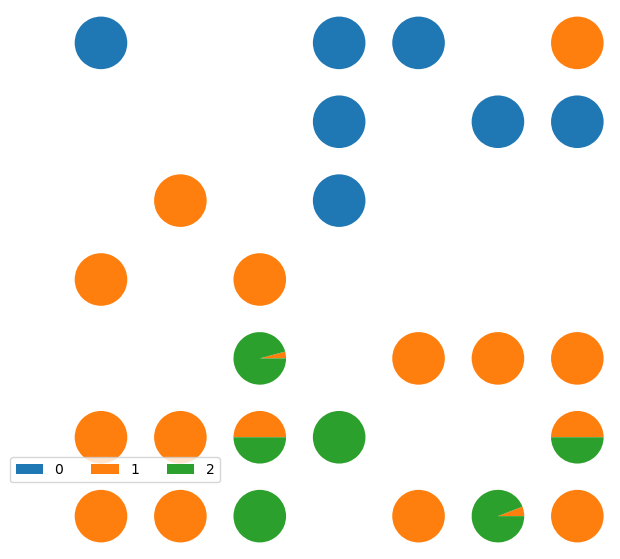

In [29]:
plt.figure(figsize =(7,7))
the_grid = GridSpec(7,7)

for position in label_map.keys():
    label_fracs = [label_map[position][l] for l in label_name]
    plt.subplot(the_grid[6-position[1],position[0]],aspect =1)
    patches,texts = plt.pie(label_fracs)
plt.legend(patches, label_name, bbox_to_anchor=(0,1.5), ncol=3)

plt.show()

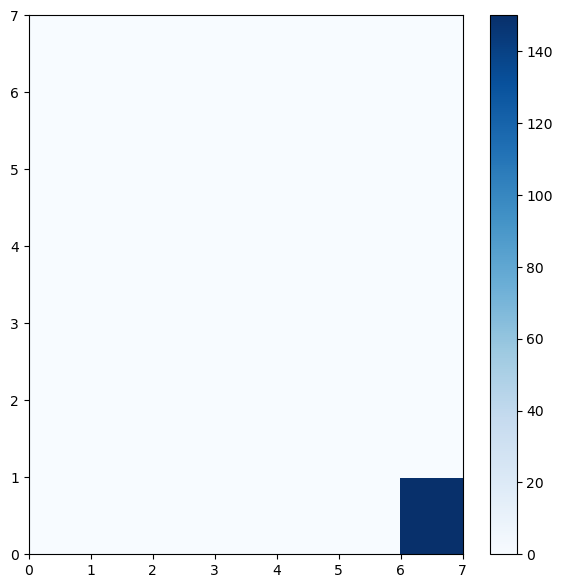

In [30]:
plt.figure(figsize =(7,7))
frequency = np.zeros((7,7))
for position, values in som.win_map(cleaneddata.to_numpy()).items():
    frequency[position[0], position[1]] = len(values)
plt.pcolor(frequency,cmap= 'Blues')
plt.colorbar()
plt.show()

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Training Error (Quantization Error Curve)<br>
Plot the quantization error vs iterations to check convergence.<br>
Quantization error = average distance between each input vector and its BMU (best matching unit).

C:\Users\dchan\TOOLS\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


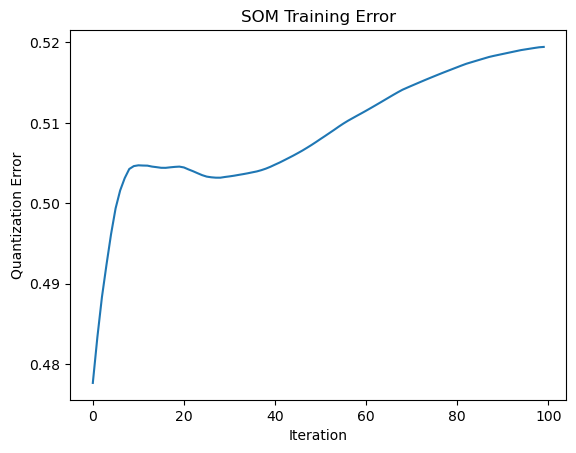

In [31]:
errors = []
for i in range(100):
    som.train_random(X_array, 1)
    errors.append(som.quantization_error(X_array))

plt.plot(errors)
plt.xlabel("Iteration")
plt.ylabel("Quantization Error")
plt.title("SOM Training Error")
plt.show()


<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
U-Matrix (Unified Distance Matrix)<br>
Shows distances between neighboring neurons.<br>
Clusters appear as low-distance regions (dark) separated by high-distance regions (light).</h1>

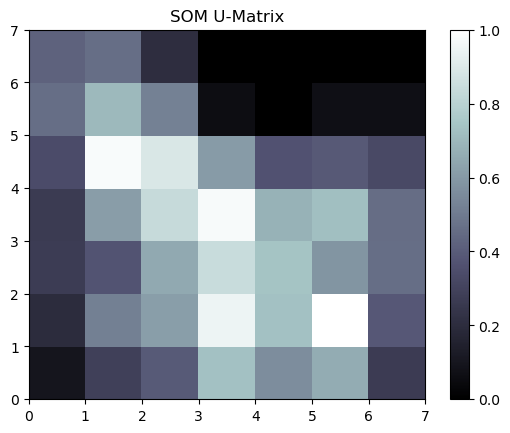

In [32]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
plt.title("SOM U-Matrix")
show()


<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">Hit Map (Neuron Activation Map)<br>
Shows how many samples map to each neuron.<br>
Helps identify dense clusters vs empty nodes.

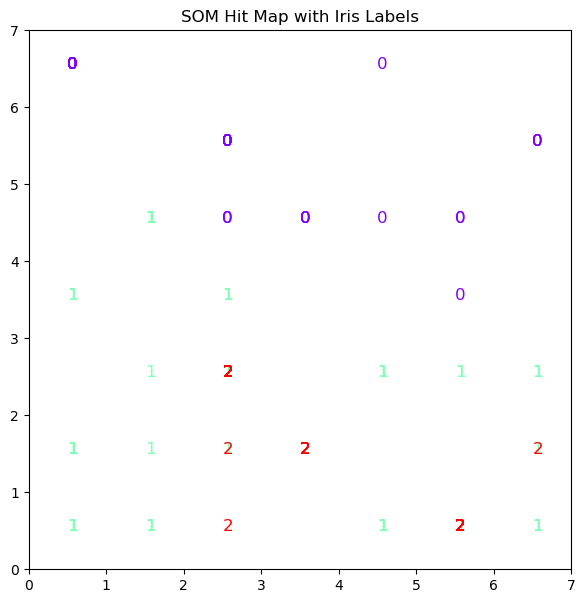

In [33]:
plt.figure(figsize=(7,7))
for i, x in enumerate(X_array):
    w = som.winner(x)
    plt.text(w[0]+0.5, w[1]+0.5, str(y[i]),
             color=plt.cm.rainbow(y[i] / 2.), fontdict={'size':12})
plt.xlim([0, som._weights.shape[0]])
plt.ylim([0, som._weights.shape[1]])
plt.title("SOM Hit Map with Iris Labels")
plt.show()
